In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read in hand-made specificity manipulation

In [2]:
stimuli = pd.read_excel('stimuli_specificity_2023-05-19.xlsx')
stimuli.set_index('word2')

,set_nr,specificity,word1,probe,answer
word2,,,,,
kangaroo,1,high,vpbyzkgrf,NaN,NaN
animal,1,mid,hopping,NaN,NaN
animal,1,low,ypdcglkc,NaN,NaN
snail,2,high,tqvgqrz,NaN,NaN
animal,2,mid,slow,NaN,NaN
...,...,...,...,...,...
food,100,mid,Italian,NaN,NaN
food,100,low,tqvgqrz,NaN,NaN
sushi,101,high,zrtqgfplh,NaN,NaN


Add in psycholinguistic properties

In [3]:
stimuli = pd.read_excel('stimuli_specificity_2023-05-19.xlsx')

resources = [('zipf','../resources/subtlex_uk.csv','LogFreq(Zipf)'),
             ('CNC_M','../resources/brysbaert_etal_2014.csv','Conc_M'),
             ('CNC_SD','../resources/brysbaert_etal_2014.csv','Conc_SD'),
             ('imageability','../resources/scott_etal_2019.csv','IMAG'),
             ('valence','../resources/scott_etal_2019.csv','VAL'),
             ('AoA','../resources/kuperman_etal_2012.csv','Rating.Mean'),
             ('RT','../resources/blp-items.xls','rt')]

def get_stimulus_property(resource='', dataframe=None):
    stim_property = resource[0]
    resource_fname = resource[1]
    col_name = resource[2]
    if stim_property == 'RT':
        resource_df = pd.read_excel(resource_fname, index_col=0)
    else:
        resource_df = pd.read_csv(resource_fname, index_col=0)
    dataframe = dataframe.merge(resource_df[col_name].rename(stim_property), left_on='word2', right_index=True, how='left')
    dataframe = dataframe.astype({stim_property:'float'})
    return dataframe

# count word length in number of letters
stimuli['length'] = stimuli['word2'].str.len()

for resource in resources:
    stimuli = get_stimulus_property(resource=resource, dataframe=stimuli)

stimuli

C:\Users\rl05\AppData\Local\Temp\ipykernel_13204\3613646000.py:18: DtypeWarning: Columns (11,25) have mixed types. Specify dtype option on import or set low_memory=False.
  resource_df = pd.read_csv(resource_fname, index_col=0)


,set_nr,specificity,word1,word2,probe,answer,length,zipf,CNC_M,CNC_SD,imageability,valence,AoA,RT
0,1,high,vpbyzkgrf,kangaroo,NaN,NaN,8,3.62,4.86,0.76,6.793,6.438,5.55,NaN
1,1,mid,hopping,animal,NaN,NaN,6,4.93,4.61,0.80,6.647,6.206,2.89,NaN
2,1,low,ypdcglkc,animal,NaN,NaN,6,4.93,4.61,0.80,6.647,6.206,2.89,NaN
3,2,high,tqvgqrz,snail,NaN,NaN,5,3.69,4.93,0.27,6.815,4.645,5.79,538.342105
4,2,mid,slow,animal,NaN,NaN,6,4.93,4.61,0.80,6.647,6.206,2.89,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,100,mid,Italian,food,NaN,NaN,4,5.45,4.80,0.82,6.500,7.606,3.25,499.184211
299,100,low,tqvgqrz,food,NaN,NaN,4,5.45,4.80,0.82,6.500,7.606,3.25,499.184211
300,101,high,zrtqgfplh,sushi,NaN,NaN,5,3.40,4.96,0.19,NaN,NaN,11.19,NaN
301,101,mid,Japanese,food,NaN,NaN,4,5.45,4.80,0.82,6.500,7.606,3.25,499.184211


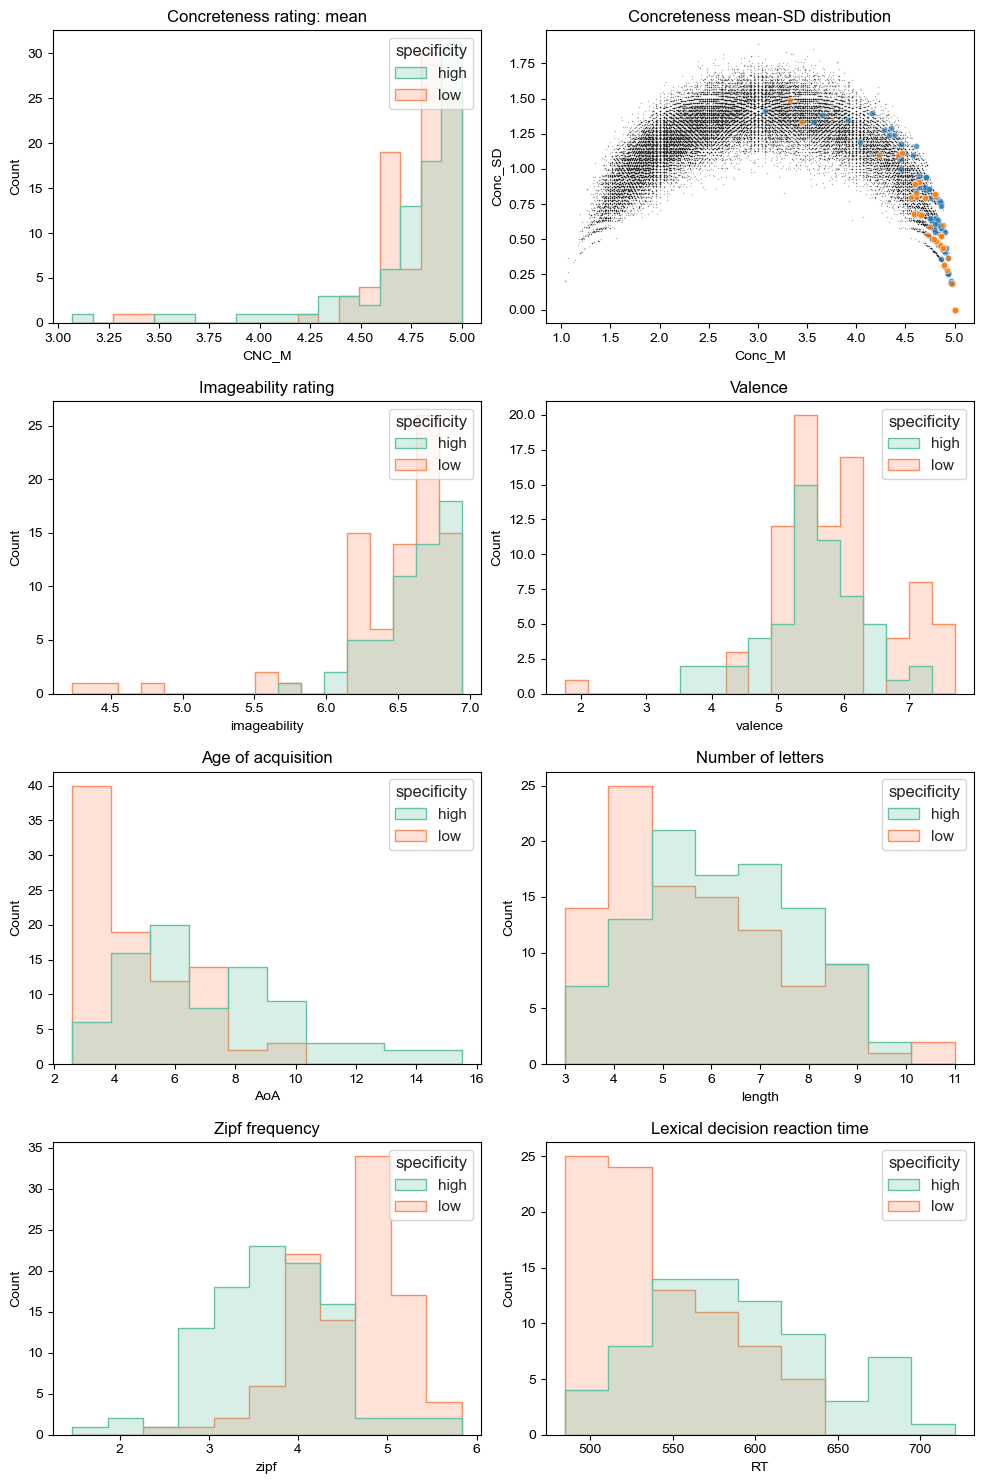

In [4]:
data = stimuli.query('specificity=="high" | specificity=="low"')
fig, axes = plt.subplots(4, 2, figsize=(10,15))
sns.set_context(font_scale=2)
sns.set_theme(style='white', palette='Set2')
sns.histplot(x='CNC_M', hue='specificity', data=data, ax=axes[0,0], element='step').set(title='Concreteness rating: mean')
sns.scatterplot(x='Conc_M', y='Conc_SD', data=pd.read_csv('../resources/brysbaert_etal_2014.csv'), s=1, alpha=0.3, ax=axes[0,1], color='black').set(title='Concreteness mean-SD distribution')
sns.scatterplot(x='CNC_M', y='CNC_SD', data=data.query('specificity == "high"'), s=20, alpha=0.7, ax=axes[0,1])
sns.scatterplot(x='CNC_M', y='CNC_SD', data=data.query('specificity == "mid"'), s=20, alpha=0.7, ax=axes[0,1])
sns.scatterplot(x='CNC_M', y='CNC_SD', data=data.query('specificity == "low"'), s=20, alpha=0.7, ax=axes[0,1])
sns.histplot(x='imageability', hue='specificity', data=data, ax=axes[1,0], element='step').set(title='Imageability rating')
sns.histplot(x='valence', hue='specificity', data=data, ax=axes[1,1], element='step').set(title='Valence')

sns.histplot(x='AoA', hue='specificity', data=data, ax=axes[2,0], element='step').set(title='Age of acquisition')
sns.histplot(x='length', hue='specificity', data=data, ax=axes[2,1], element='step').set(title='Number of letters')

sns.histplot(x='zipf', hue='specificity', data=data, ax=axes[3,0], element='step').set(title='Zipf frequency')
sns.histplot(x='RT', hue='specificity', data=data, ax=axes[3,1], element='step').set(title='Lexical decision reaction time')
fig.tight_layout()

# for ax, label in zip(axes.ravel(), 'ABCDEFGHIJ'):
#     ax.text(0.03, ax.get_position().ymax, label, transform=fig.transFigure,
#             fontsize=15, fontweight='bold', va='top', ha='left')

In [5]:
stimuli.to_csv('stimuli_specificity_2023-05-25.csv')